In [1]:
%reload_ext autoreload
%autoreload 2

import os, psutil

from rocket_fft import numpy_like, scipy_like

numpy_like()

os.environ['NUMEXPR_MAX_THREADS'] = '20'
os.environ['NUMBA_DEBUGINFO'] = '0'

from alphadia.extraction import processlogger
processlogger.init_logging()
import logging

logger = logging.getLogger()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neptune.new as neptune
import alphatims.bruker as bruker

from alphabase.spectral_library.base import SpecLibBase
from alphadia.extraction.planning import Plan, Workflow

yaml_file = 'config.yaml'

raw_files = ['/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-G1_1_1829.d',
             '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-E5_1_1821.d',
             '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-D3_1_1813.d',
             '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-C1_1_1805.d'

             ]

output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_27_alphadia_mDIA_synchroPasef/data_small_lib_mbr'

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logger.error('NEPTUNE_TOKEN environtment variable not set')

0:00:01.057752  WARNING: WARNING: Temp mmap arrays are written to /var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/temp_mmap_xmuas_q9. Cleanup of this folder is OS dependant, and might need to be triggered manually! Current space: 90,650,570,752
0:00:01.069738  WARNING: WARNING: No Bruker libraries are available for this operating system. Mobility and m/z values need to be estimated. While this estimation often returns acceptable results with errors < 0.02 Th, huge errors (e.g. offsets of 6 Th) have already been observed for some samples!
0:00:01.070094  INFO: 


In [2]:
test_lib = SpecLibBase()
test_lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/marvin_scp/MSfragger_library_mod_noLossType_d0_d4_d8_d12_shared_eg_n_fragments_mbr.hdf'
test_lib.load_hdf(test_lib_location, load_mod_seq=True)

0:00:05.171053  PROGRESS:       _   _      _         ___ ___   _   
0:00:05.171544  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:05.171807  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:05.171977  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:05.172160  PROGRESS:            |_|                            
0:00:05.172446  PROGRESS: 
0:00:05.173137  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
0:00:05.179470  INFO: Applying config update from dict
0:00:05.179851  PROGRESS: version: 1.0.2
0:00:05.180401  PROGRESS: hostname: Georgs-MacBook-Pro.local
0:00:05.180643  PROGRESS: date: 2023-05-18 15:02:16
0:00:08.833221  INFO: renaming precursor_columns columns
0:00:08.834219  INFO: renaming fragment_columns columns
0:00:08.834612  INFO: ========= Library Stats =========
0:00:08.834864  INFO: Number of precursors: 220,333
0:00:08.863714  INFO: 	thereof targets:176,268
0:00:08.86

7836


  0%|          | 0/13816 [00:00<?, ?it/s]/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from float64 to float32. Precision may be lost.
  numba_func(i, *args)
/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from int64 to float32. Precision may be lost.
  numba_func(i, *args)
100%|██████████| 13816/13816 [00:01<00:00, 8120.21it/s] 
0:05:38.392264  INFO: Scored 13816 candidates
0:05:38.397212  INFO: 0.19% of targets failed, 0.54% of decoys failed
0:05:38.648593  INFO: number of dfs in features: 1, total number of features: 13766


(13766, 25)
(13766,)


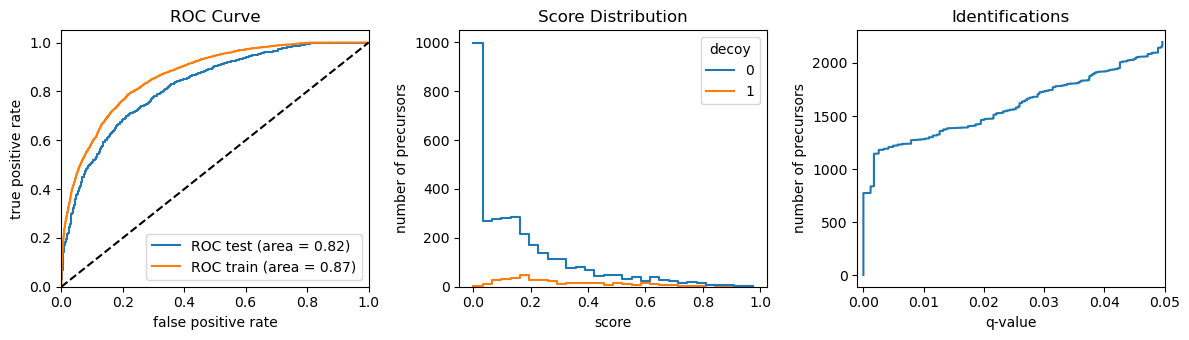

0:05:40.362314  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:05:40.363764  PROGRESS: Accumulated precursors: 3,909, 0.01 FDR: 1,280, 0.001 FDR: 774
0:05:40.364718  INFO: calibration group: precursor, fitting mz estimator 


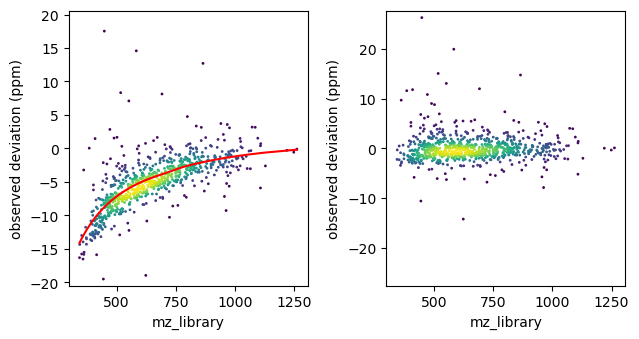

0:05:40.461815  INFO: calibration group: precursor, fitting rt estimator 


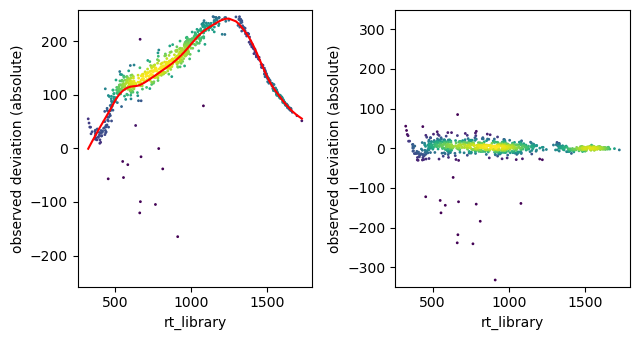

0:05:40.555716  INFO: calibration group: precursor, fitting mobility estimator 


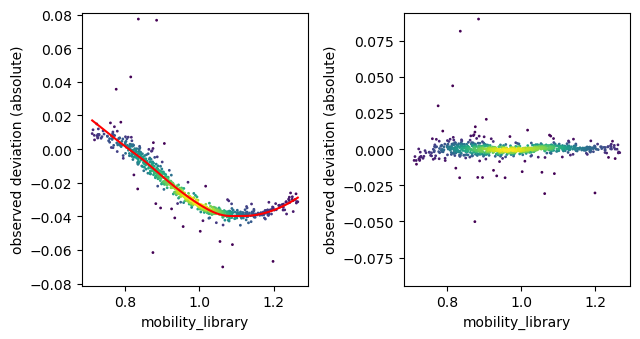

0:05:40.660425  INFO: calibration group: fragment, fitting mz estimator 


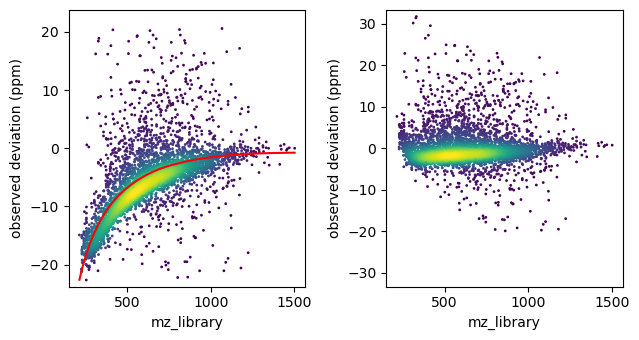

0:05:40.957661  INFO: calibration group: precursor, predicting mz
0:05:40.966580  INFO: calibration group: precursor, predicting rt
0:05:40.993727  INFO: calibration group: precursor, predicting mobility
0:05:41.005199  INFO: calibration group: fragment, predicting mz
0:05:41.296371  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:05:41.301002  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.02
0:05:41.303067  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:05:41.303369  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:05:41.303579  INFO: FWHM in RT is 4.25 seconds, sigma is 1.57
0:05:41.303795  INFO: FWHM in mobility is 0.009 1/K_0, sigma is 5.70


7842


100%|██████████| 13039/13039 [00:01<00:00, 10527.52it/s]
0:05:57.457273  INFO: Scored 13039 candidates
0:05:57.466067  INFO: 0.76% of targets failed, 2.34% of decoys failed
0:05:57.596056  INFO: number of dfs in features: 1, total number of features: 12837


(12837, 25)
(12837,)


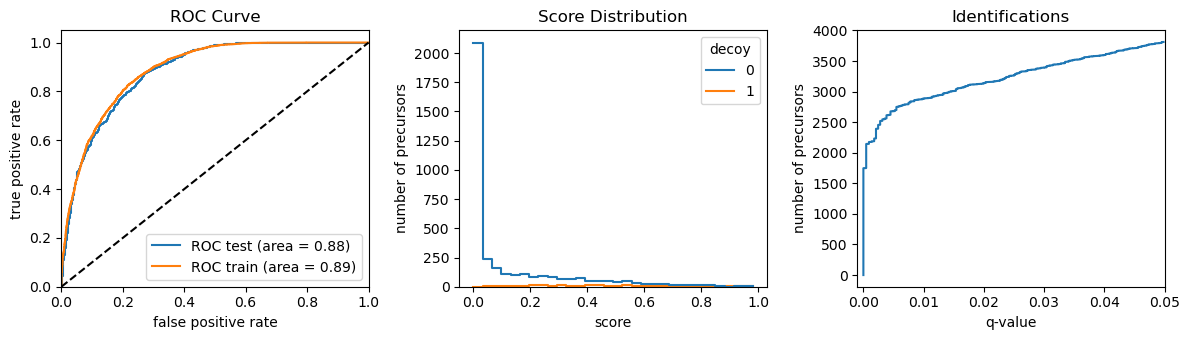

0:05:58.253005  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:05:58.253335  PROGRESS: Accumulated precursors: 3,898, 0.01 FDR: 2,885, 0.001 FDR: 2,177
0:05:58.254535  INFO: calibration group: precursor, fitting mz estimator 


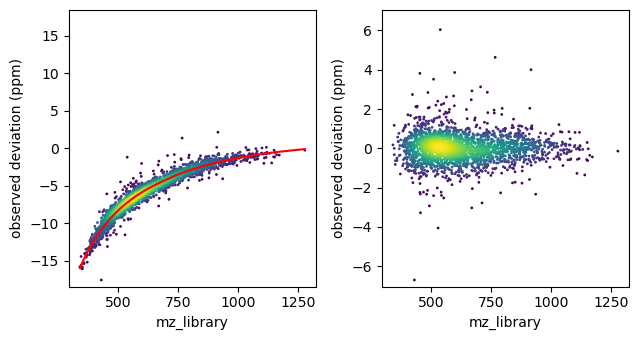

0:05:58.409315  INFO: calibration group: precursor, fitting rt estimator 


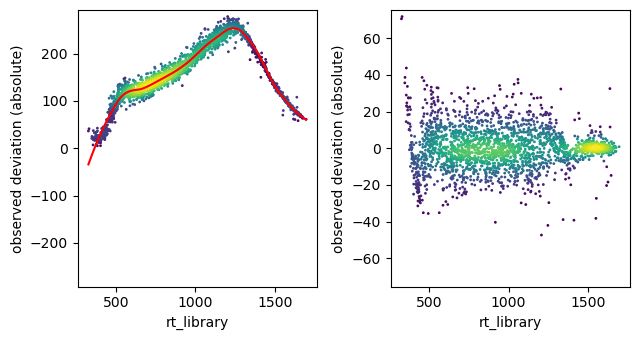

0:05:58.553695  INFO: calibration group: precursor, fitting mobility estimator 


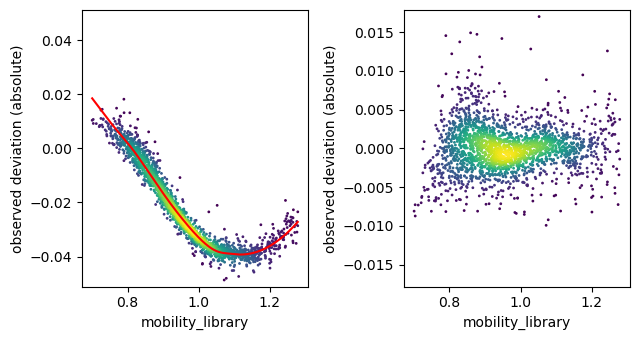

0:05:58.710127  INFO: calibration group: fragment, fitting mz estimator 


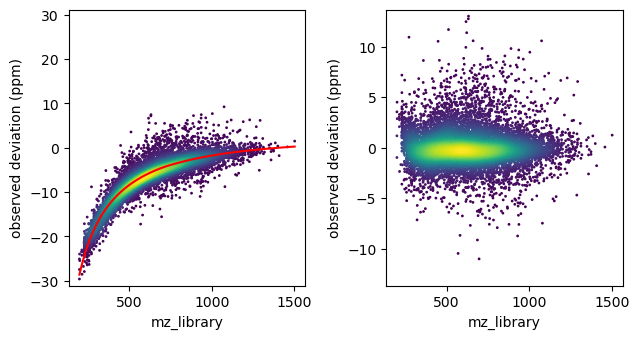

0:06:00.006599  INFO: calibration group: precursor, predicting mz
0:06:00.018250  INFO: calibration group: precursor, predicting rt
0:06:00.046781  INFO: calibration group: precursor, predicting mobility
0:06:00.058128  INFO: calibration group: fragment, predicting mz
0:06:00.351548  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:06:00.356399  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.02
0:06:00.358120  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:06:00.358409  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:06:00.358613  INFO: FWHM in RT is 3.75 seconds, sigma is 1.39
0:06:00.358795  INFO: FWHM in mobility is 0.006 1/K_0, sigma is 4.21


7808


100%|██████████| 12492/12492 [00:01<00:00, 10515.46it/s]
0:06:16.360102  INFO: Scored 12492 candidates
0:06:16.364826  INFO: 0.96% of targets failed, 2.14% of decoys failed
0:06:16.484543  INFO: number of dfs in features: 1, total number of features: 12298


(12298, 25)
(12298,)


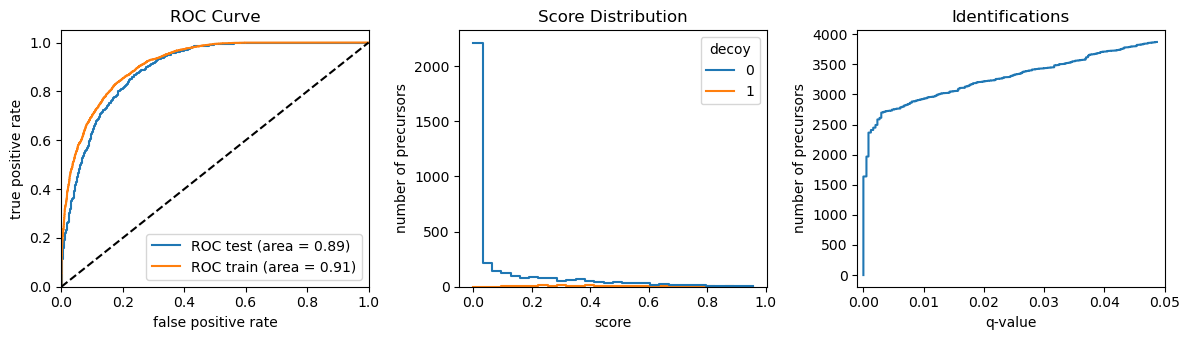

0:06:17.482207  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:06:17.482519  PROGRESS: Accumulated precursors: 3,873, 0.01 FDR: 2,933, 0.001 FDR: 2,367
0:06:17.483564  INFO: calibration group: precursor, fitting mz estimator 


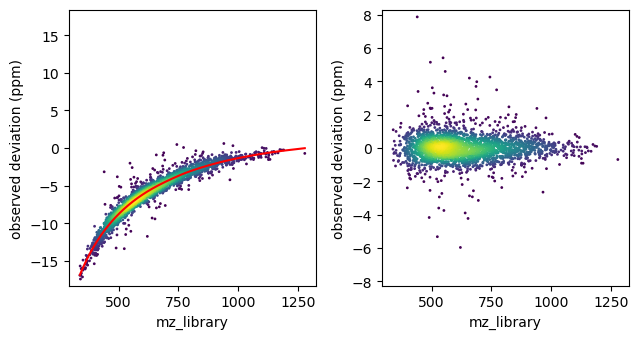

0:06:17.641881  INFO: calibration group: precursor, fitting rt estimator 


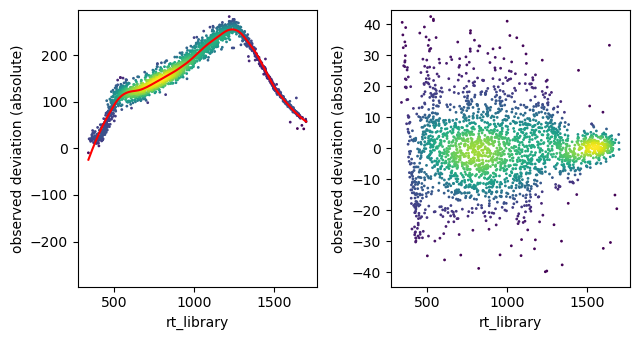

0:06:17.811787  INFO: calibration group: precursor, fitting mobility estimator 


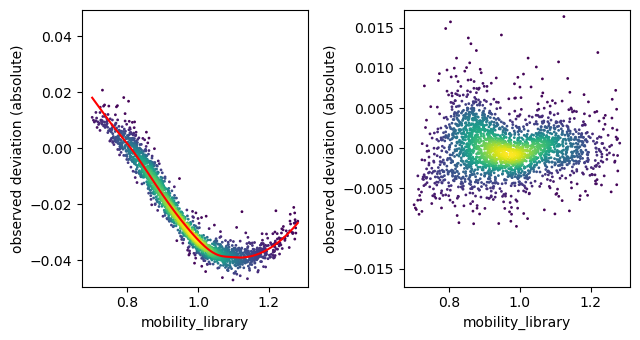

0:06:17.984002  INFO: calibration group: fragment, fitting mz estimator 


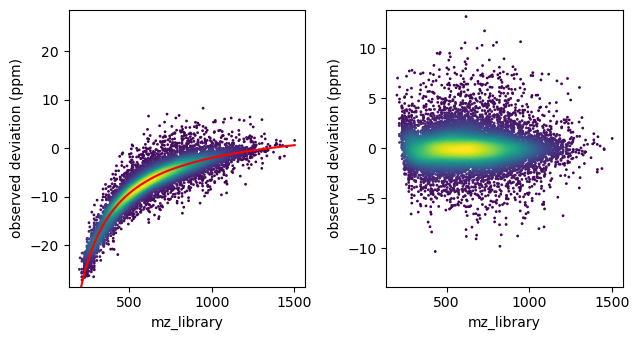

0:06:19.426370  INFO: calibration group: precursor, predicting mz
0:06:19.484653  INFO: calibration group: precursor, predicting rt
0:06:19.516165  INFO: calibration group: precursor, predicting mobility
0:06:19.530686  INFO: calibration group: fragment, predicting mz
0:06:19.860653  INFO: calibration group: precursor, predicting mz
0:06:19.873048  INFO: calibration group: precursor, predicting rt
0:06:19.901355  INFO: calibration group: precursor, predicting mobility
0:06:19.914464  INFO: calibration group: fragment, predicting mz
0:06:20.202663  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.02
0:06:20.219516  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:06:20.219952  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:06:20.220204  INFO: FWHM in RT is 3.62 seconds, sigma is 1.34
0:06:20.220404  INFO: FWHM in mobility is 0.006 1/K_0, sigma is 4.05


88132


100%|██████████| 302925/302925 [00:29<00:00, 10344.39it/s]
0:11:08.217058  INFO: Scored 302925 candidates
0:11:08.308957  INFO: 1.22% of targets failed, 2.90% of decoys failed


(296655, 25)
(296655,)


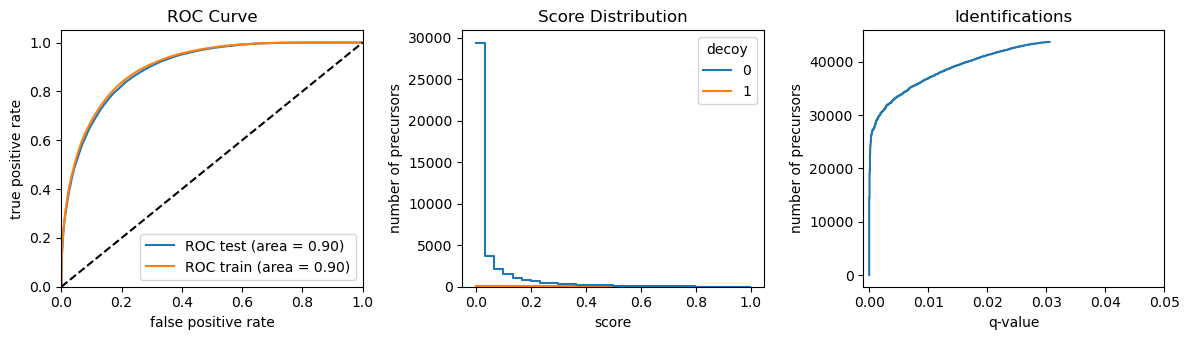

0:11:32.303993  PROGRESS: === extraction finished, 0.05 FDR: 42,442, 0.01 FDR: 36,552, 0.001 FDR: 28,114 ===
0:11:33.427259  INFO: calibration group: precursor, predicting mz
0:11:33.447297  INFO: calibration group: precursor, predicting rt
0:11:33.523137  INFO: calibration group: precursor, predicting mobility
0:11:33.548738  INFO: calibration group: fragment, predicting mz
100%|██████████| 36552/36552 [00:01<00:00, 18909.94it/s]
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:107: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features_df = df[set(df.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])].copy()
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

(70718, 60)
(70718,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


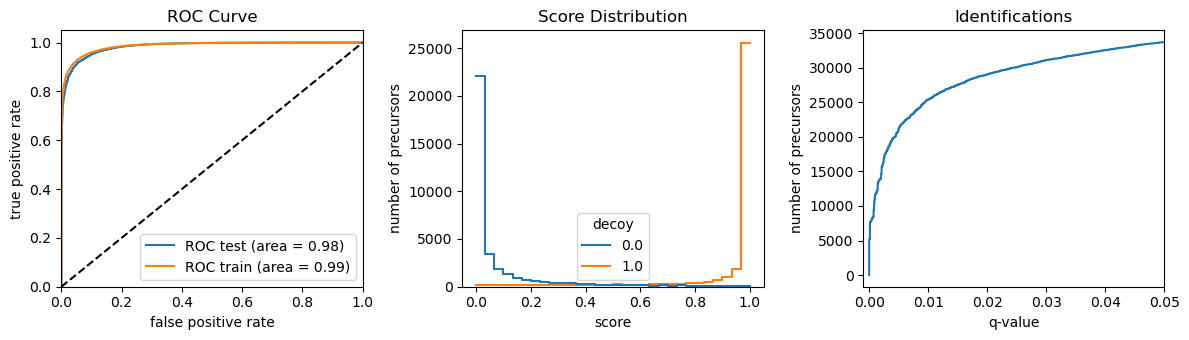

25392
4167
(70701, 60)
(70701,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['decoy'] = np.zeros(len(channel_df))
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


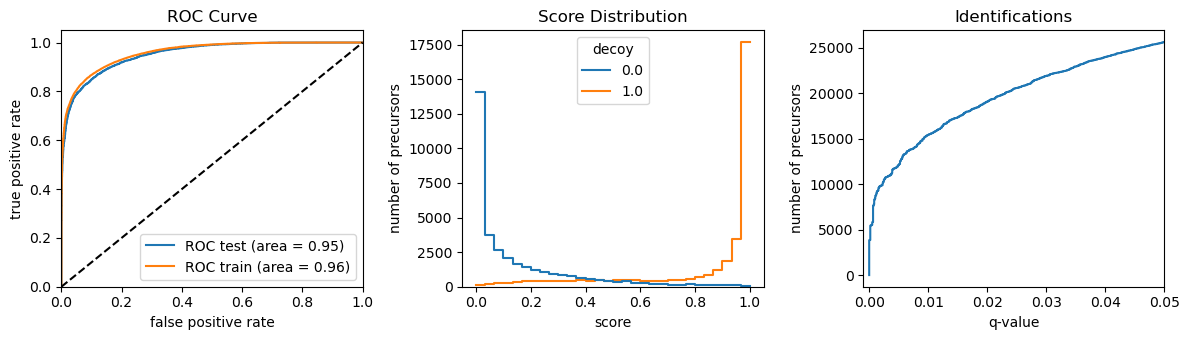

15417
3476


0:13:28.979307  INFO: Importing data from /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-E5_1_1821.d
0:13:28.979922  INFO: Using .d import for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-E5_1_1821.d
0:13:28.980401  INFO: Reading frame metadata for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-E5_1_1821.d
0:13:29.485400  INFO: Reading 16,189 frames with 2,536,150,789 detector events for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-E5_1_1821.d
100%|██████████| 16189/16189 [00:07<00:00, 2178.81it/s]
0:13:36.978977  INFO: Indexing /Users/georgwallmann/Documents/data/alpha

7802


100%|██████████| 13948/13948 [00:01<00:00, 9881.90it/s]
0:17:45.082089  INFO: Scored 13948 candidates
0:17:45.086846  INFO: 0.20% of targets failed, 0.29% of decoys failed
0:17:45.161480  INFO: number of dfs in features: 1, total number of features: 13914


(13914, 25)
(13914,)


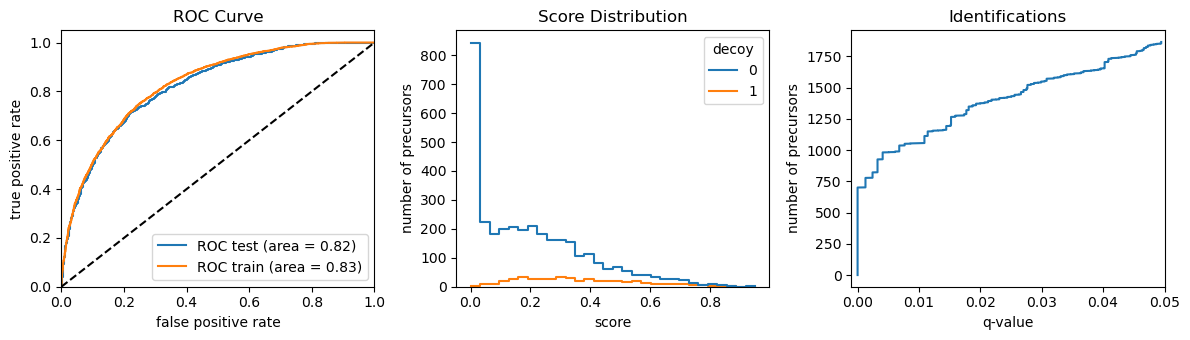

0:17:45.825544  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:17:45.825894  PROGRESS: Accumulated precursors: 3,894, 0.01 FDR: 1,056, 0.001 FDR: 702
0:17:45.826620  INFO: calibration group: precursor, fitting mz estimator 


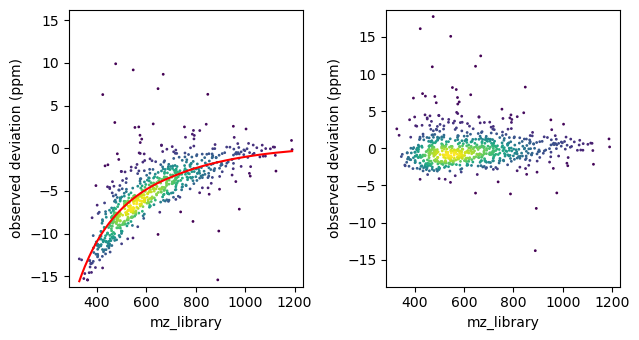

0:17:45.923510  INFO: calibration group: precursor, fitting rt estimator 


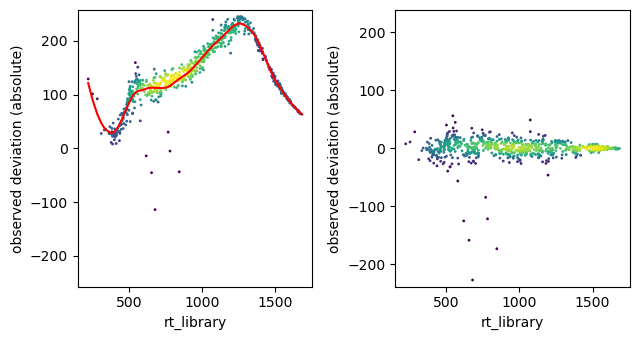

0:17:46.010064  INFO: calibration group: precursor, fitting mobility estimator 


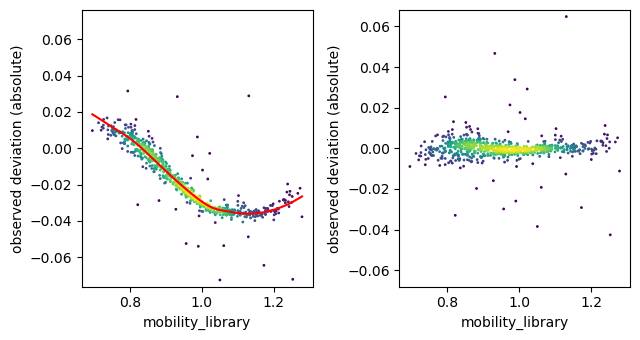

0:17:46.106335  INFO: calibration group: fragment, fitting mz estimator 


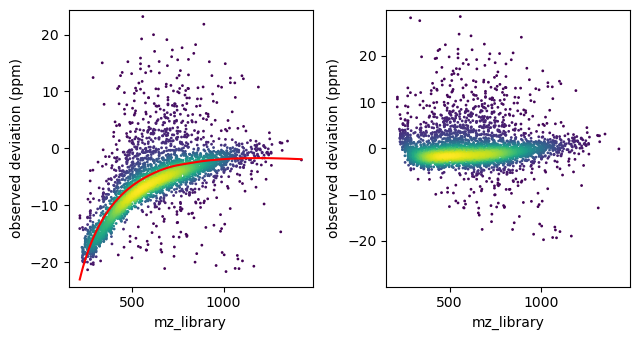

0:17:46.346236  INFO: calibration group: precursor, predicting mz
0:17:46.354680  INFO: calibration group: precursor, predicting rt
0:17:46.390405  INFO: calibration group: precursor, predicting mobility
0:17:46.402553  INFO: calibration group: fragment, predicting mz
0:17:46.713469  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:17:46.716789  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.02
0:17:46.718585  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:17:46.718883  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:46.719101  INFO: FWHM in RT is 4.38 seconds, sigma is 1.62
0:17:46.719374  INFO: FWHM in mobility is 0.009 1/K_0, sigma is 6.10


7826


100%|██████████| 13122/13122 [00:01<00:00, 10238.66it/s]
0:18:02.393143  INFO: Scored 13122 candidates
0:18:02.397695  INFO: 0.48% of targets failed, 1.80% of decoys failed
0:18:02.459711  INFO: number of dfs in features: 1, total number of features: 12973


(12973, 25)
(12973,)


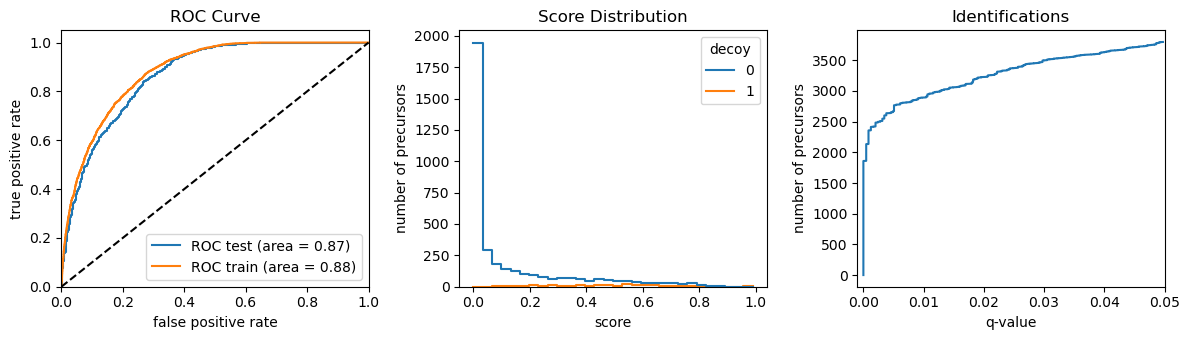

0:18:03.055228  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:18:03.055501  PROGRESS: Accumulated precursors: 3,892, 0.01 FDR: 2,893, 0.001 FDR: 2,358
0:18:03.056345  INFO: calibration group: precursor, fitting mz estimator 


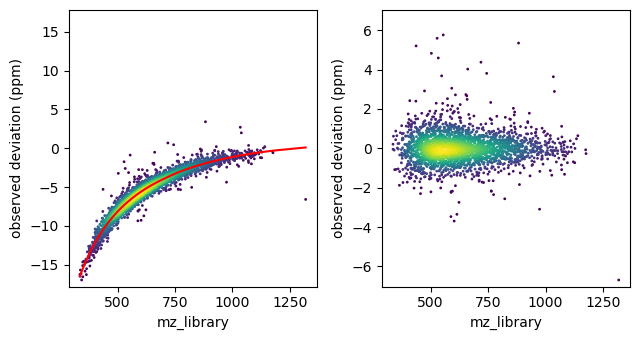

0:18:03.214345  INFO: calibration group: precursor, fitting rt estimator 


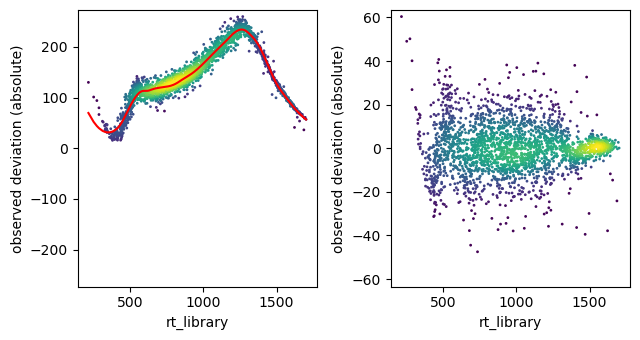

0:18:03.365812  INFO: calibration group: precursor, fitting mobility estimator 


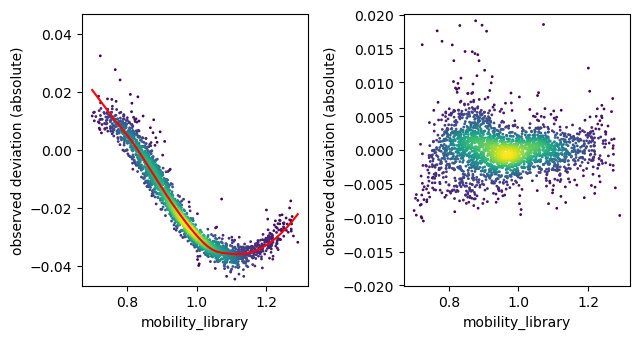

0:18:03.532845  INFO: calibration group: fragment, fitting mz estimator 


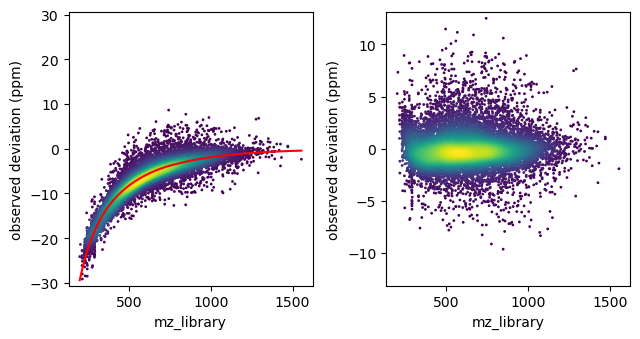

0:18:05.093976  INFO: calibration group: precursor, predicting mz
0:18:05.102582  INFO: calibration group: precursor, predicting rt
0:18:05.126407  INFO: calibration group: precursor, predicting mobility
0:18:05.136152  INFO: calibration group: fragment, predicting mz
0:18:05.448758  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:18:05.452154  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.02
0:18:05.454034  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:18:05.454320  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:18:05.454555  INFO: FWHM in RT is 3.73 seconds, sigma is 1.38
0:18:05.454740  INFO: FWHM in mobility is 0.006 1/K_0, sigma is 4.16


7836


100%|██████████| 12560/12560 [00:01<00:00, 10313.63it/s]
0:18:20.989033  INFO: Scored 12560 candidates
0:18:20.993198  INFO: 0.44% of targets failed, 1.80% of decoys failed
0:18:21.052505  INFO: number of dfs in features: 1, total number of features: 12419


(12419, 25)
(12419,)


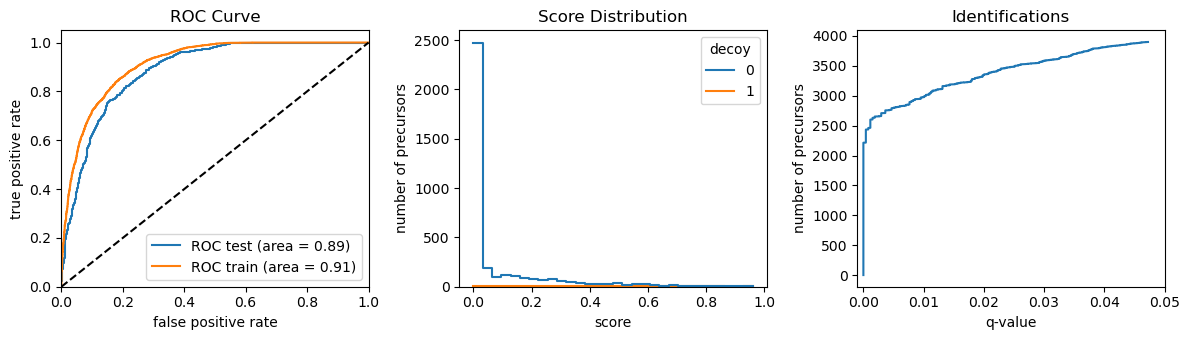

0:18:21.880401  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:18:21.880685  PROGRESS: Accumulated precursors: 3,900, 0.01 FDR: 2,977, 0.001 FDR: 2,462
0:18:21.881985  INFO: calibration group: precursor, fitting mz estimator 


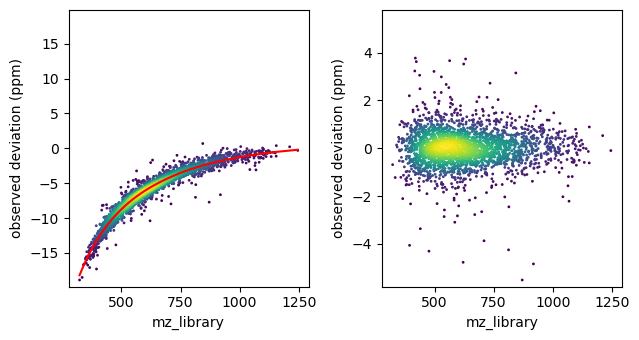

0:18:22.043511  INFO: calibration group: precursor, fitting rt estimator 


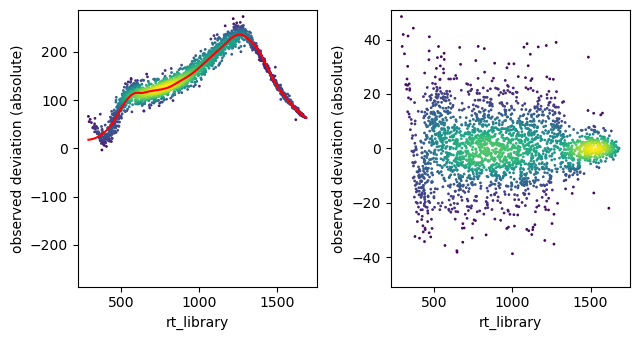

0:18:22.201160  INFO: calibration group: precursor, fitting mobility estimator 


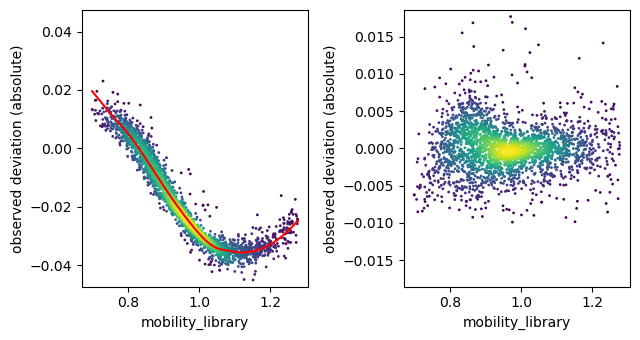

0:18:22.373934  INFO: calibration group: fragment, fitting mz estimator 


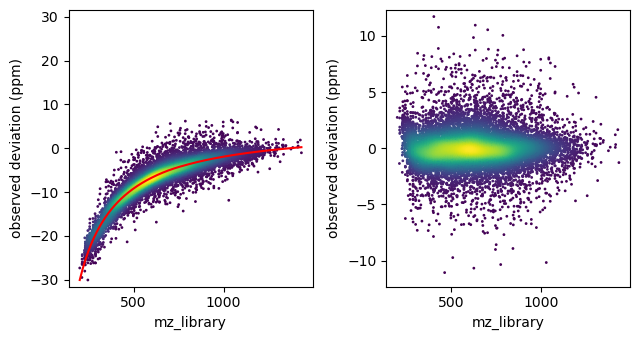

0:18:23.890401  INFO: calibration group: precursor, predicting mz
0:18:23.898926  INFO: calibration group: precursor, predicting rt
0:18:23.920034  INFO: calibration group: precursor, predicting mobility
0:18:23.929566  INFO: calibration group: fragment, predicting mz
0:18:24.234370  INFO: calibration group: precursor, predicting mz
0:18:24.244111  INFO: calibration group: precursor, predicting rt
0:18:24.265068  INFO: calibration group: precursor, predicting mobility
0:18:24.275282  INFO: calibration group: fragment, predicting mz
0:18:24.577007  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.02
0:18:24.588616  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:18:24.589035  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:18:24.589319  INFO: FWHM in RT is 3.67 seconds, sigma is 1.36
0:18:24.589683  INFO: FWHM in mobility is 0.006 1/K_0, sigma is 4.07


88132


100%|██████████| 304348/304348 [00:29<00:00, 10181.09it/s]
0:23:12.042698  INFO: Scored 304348 candidates
0:23:12.130835  INFO: 0.74% of targets failed, 2.16% of decoys failed


(299922, 25)
(299922,)


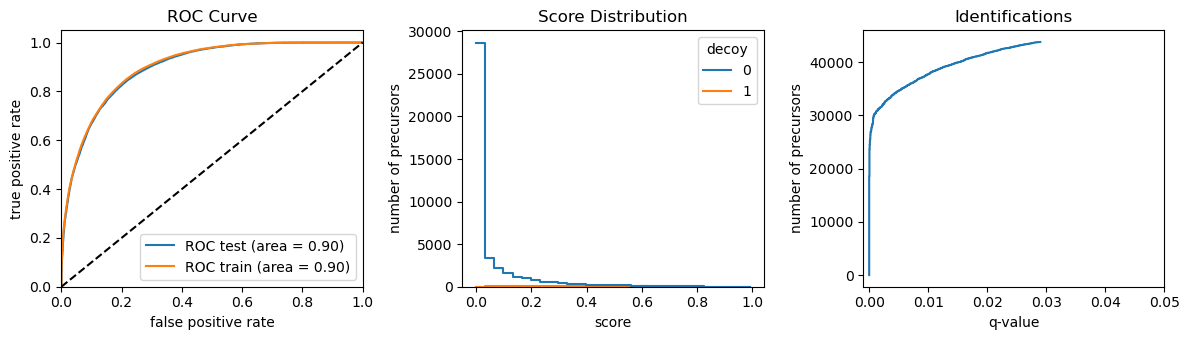

0:23:28.625636  PROGRESS: === extraction finished, 0.05 FDR: 42,581, 0.01 FDR: 37,375, 0.001 FDR: 30,357 ===
0:23:29.782921  INFO: calibration group: precursor, predicting mz
0:23:29.802774  INFO: calibration group: precursor, predicting rt
0:23:29.858415  INFO: calibration group: precursor, predicting mobility
0:23:29.882850  INFO: calibration group: fragment, predicting mz
100%|██████████| 37375/37375 [00:01<00:00, 35023.75it/s]
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:107: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features_df = df[set(df.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])].copy()
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

(72314, 60)
(72314,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


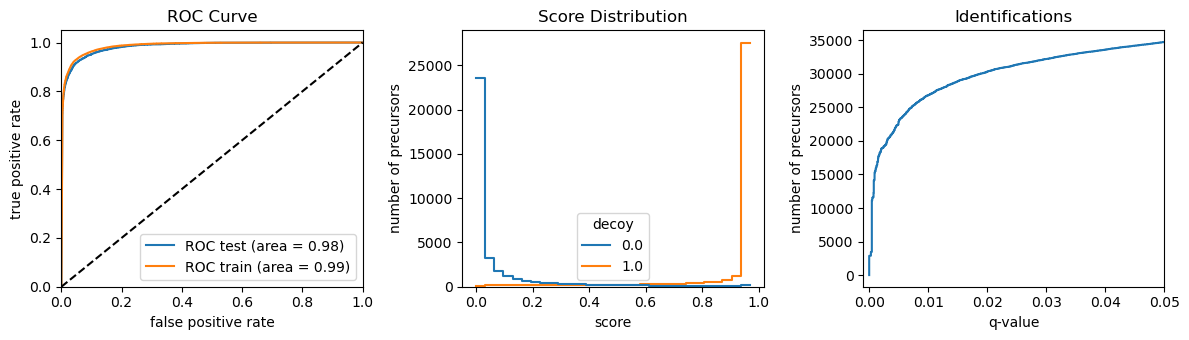

26821
4267
(72304, 60)
(72304,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['decoy'] = np.zeros(len(channel_df))
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


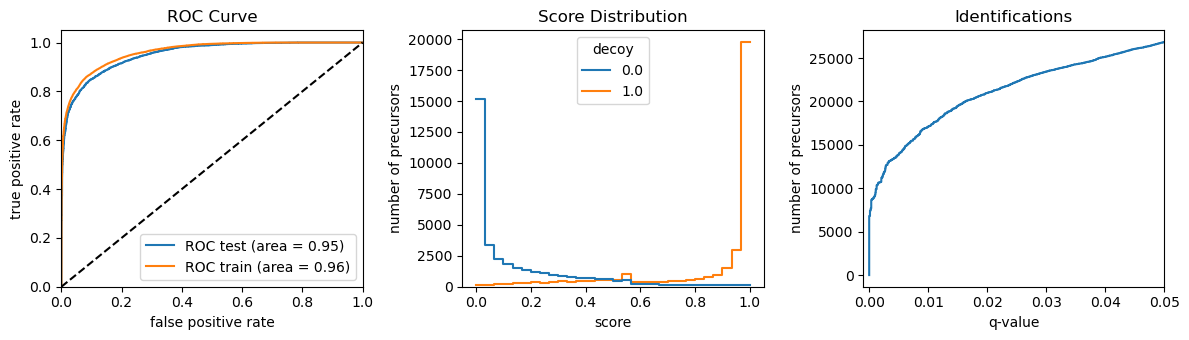

17106
3617


0:24:45.352808  INFO: Importing data from /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-D3_1_1813.d
0:24:45.353249  INFO: Using .d import for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-D3_1_1813.d
0:24:45.353478  INFO: Reading frame metadata for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-D3_1_1813.d
0:24:45.941412  INFO: Reading 16,188 frames with 2,399,021,844 detector events for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-D3_1_1813.d
100%|██████████| 16188/16188 [00:07<00:00, 2051.71it/s]
0:24:53.897808  INFO: Indexing /Users/georgwallmann/Documents/data/alpha

7800


100%|██████████| 13758/13758 [00:01<00:00, 9933.04it/s] 
0:28:57.485630  INFO: Scored 13758 candidates
0:28:57.490686  INFO: 0.34% of targets failed, 0.41% of decoys failed
0:28:57.599790  INFO: number of dfs in features: 1, total number of features: 13706


(13706, 25)
(13706,)


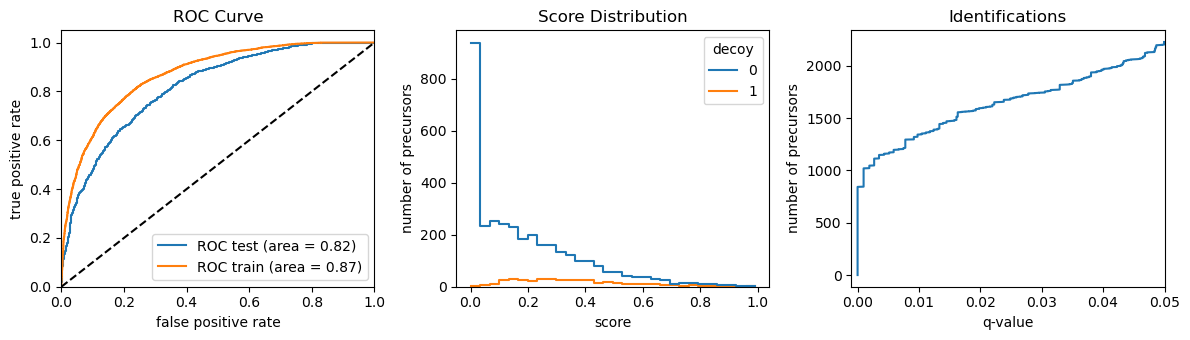

0:28:58.742720  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:28:58.742981  PROGRESS: Accumulated precursors: 3,895, 0.01 FDR: 1,344, 0.001 FDR: 1,021
0:28:58.743887  INFO: calibration group: precursor, fitting mz estimator 


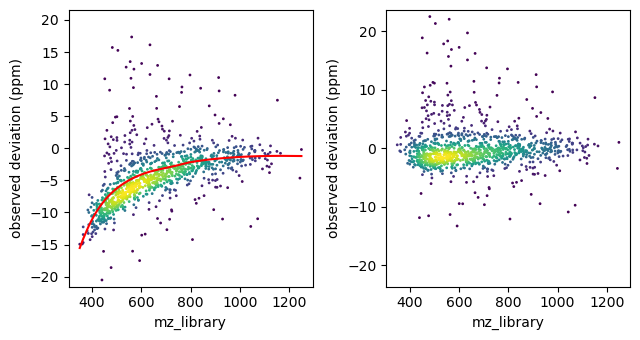

0:28:58.850087  INFO: calibration group: precursor, fitting rt estimator 


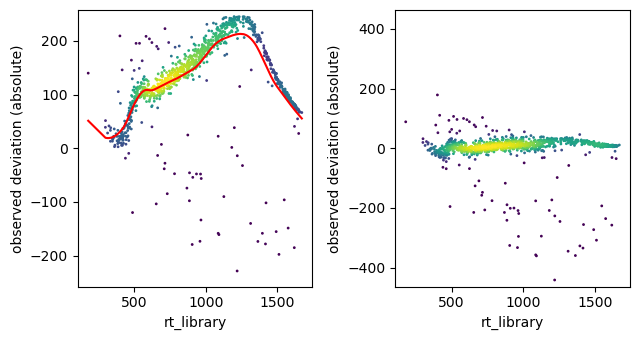

0:28:58.947532  INFO: calibration group: precursor, fitting mobility estimator 


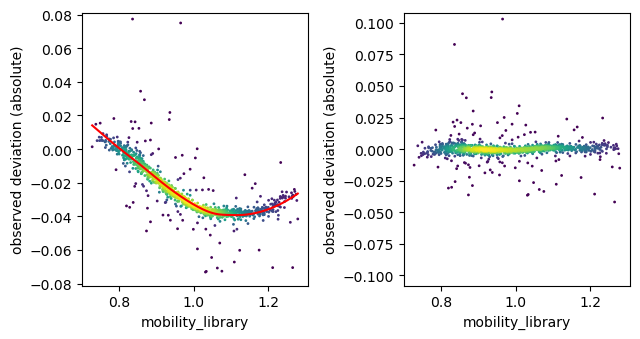

0:28:59.075421  INFO: calibration group: fragment, fitting mz estimator 


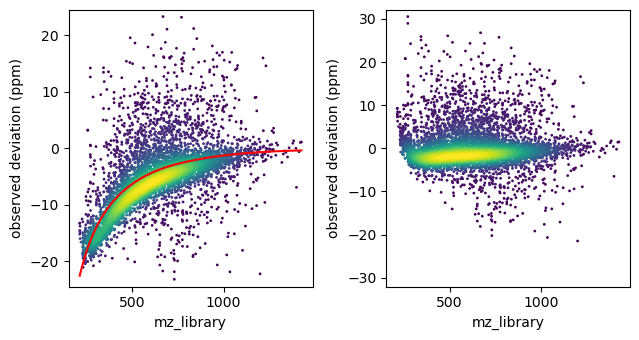

0:28:59.496110  INFO: calibration group: precursor, predicting mz
0:28:59.504694  INFO: calibration group: precursor, predicting rt
0:28:59.525249  INFO: calibration group: precursor, predicting mobility
0:28:59.534461  INFO: calibration group: fragment, predicting mz
0:28:59.828976  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:28:59.832251  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 122.48546924756451, Mobility error: 0.02
0:28:59.833944  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:28:59.834182  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:28:59.834392  INFO: FWHM in RT is 4.39 seconds, sigma is 1.62
0:28:59.834599  INFO: FWHM in mobility is 0.008 1/K_0, sigma is 5.57


7810


100%|██████████| 13094/13094 [00:01<00:00, 10150.14it/s]
0:29:22.817040  INFO: Scored 13094 candidates
0:29:22.821212  INFO: 0.47% of targets failed, 1.55% of decoys failed
0:29:22.919760  INFO: number of dfs in features: 1, total number of features: 12962


(12962, 25)
(12962,)


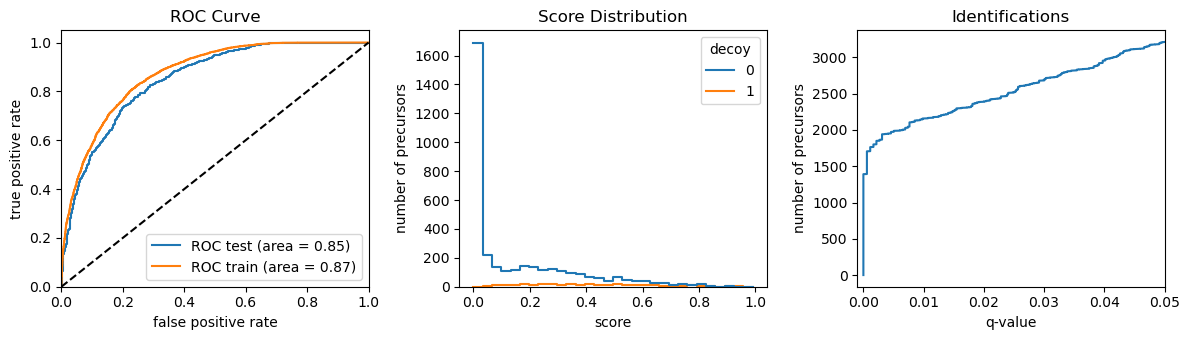

0:29:23.708653  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:29:23.709088  PROGRESS: Accumulated precursors: 3,882, 0.01 FDR: 2,159, 0.001 FDR: 1,707
0:29:23.710079  INFO: calibration group: precursor, fitting mz estimator 


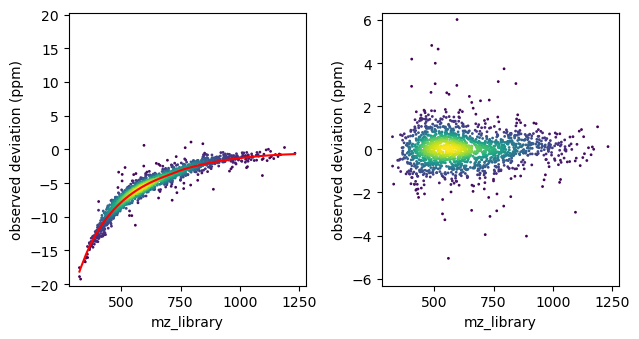

0:29:23.839434  INFO: calibration group: precursor, fitting rt estimator 


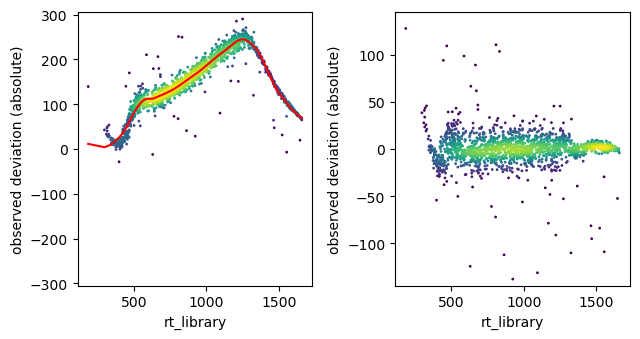

0:29:23.970359  INFO: calibration group: precursor, fitting mobility estimator 


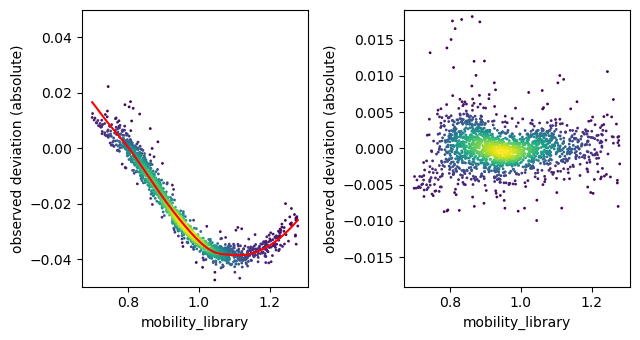

0:29:24.104526  INFO: calibration group: fragment, fitting mz estimator 


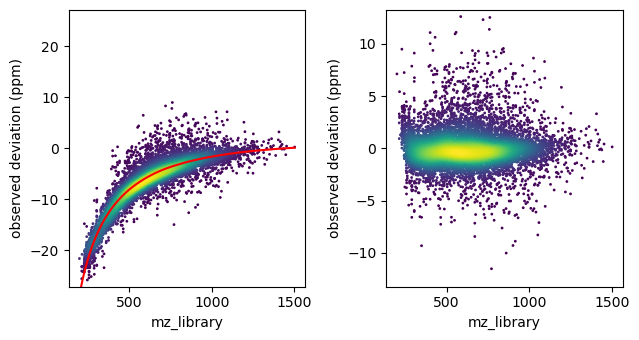

0:29:24.981546  INFO: calibration group: precursor, predicting mz
0:29:24.990075  INFO: calibration group: precursor, predicting rt
0:29:25.012239  INFO: calibration group: precursor, predicting mobility
0:29:25.021596  INFO: calibration group: fragment, predicting mz
0:29:25.314180  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:29:25.317391  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.02
0:29:25.319107  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:29:25.319386  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:29:25.319627  INFO: FWHM in RT is 3.83 seconds, sigma is 1.41
0:29:25.319840  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.49


7817


100%|██████████| 12680/12680 [00:01<00:00, 10325.05it/s]
0:29:40.580242  INFO: Scored 12680 candidates
0:29:40.584634  INFO: 0.80% of targets failed, 1.69% of decoys failed
0:29:40.679202  INFO: number of dfs in features: 1, total number of features: 12522


(12522, 25)
(12522,)


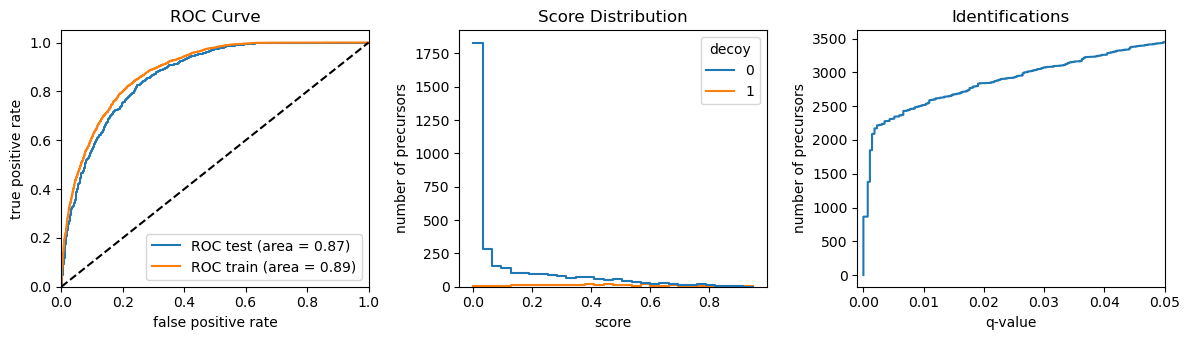

0:29:41.336989  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:29:41.337390  PROGRESS: Accumulated precursors: 3,881, 0.01 FDR: 2,514, 0.001 FDR: 1,380
0:29:41.338212  INFO: calibration group: precursor, fitting mz estimator 


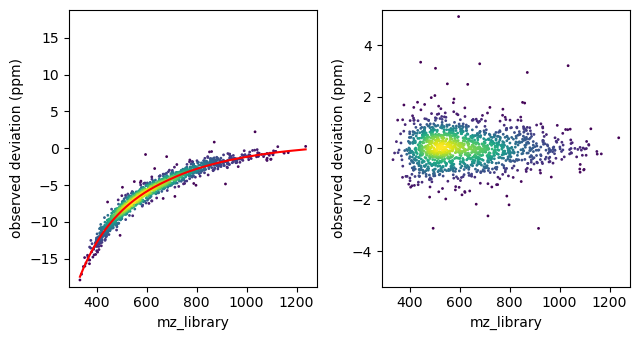

0:29:41.453783  INFO: calibration group: precursor, fitting rt estimator 


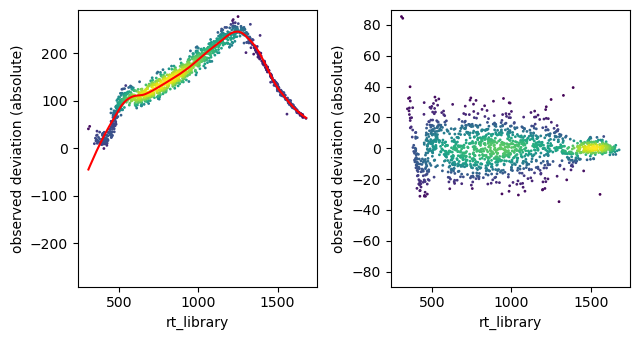

0:29:41.576248  INFO: calibration group: precursor, fitting mobility estimator 


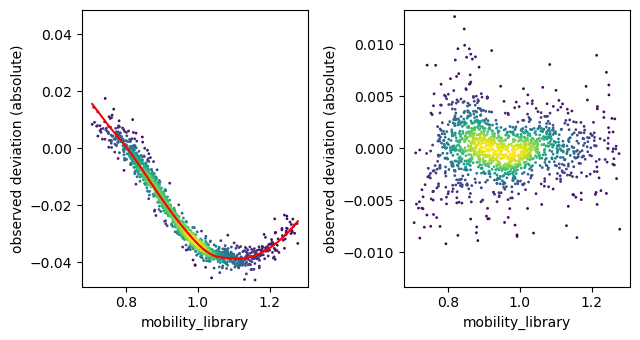

0:29:41.694614  INFO: calibration group: fragment, fitting mz estimator 


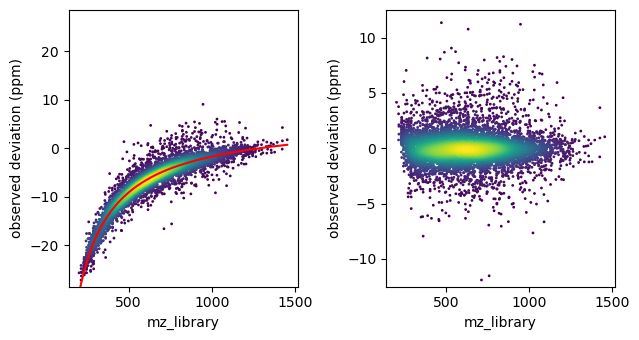

0:29:42.318908  INFO: calibration group: precursor, predicting mz
0:29:42.328255  INFO: calibration group: precursor, predicting rt
0:29:42.349892  INFO: calibration group: precursor, predicting mobility
0:29:42.360192  INFO: calibration group: fragment, predicting mz
0:29:42.672476  INFO: calibration group: precursor, predicting mz
0:29:42.681685  INFO: calibration group: precursor, predicting rt
0:29:42.704523  INFO: calibration group: precursor, predicting mobility
0:29:42.713763  INFO: calibration group: fragment, predicting mz
0:29:42.997814  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.02
0:29:43.009775  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:29:43.010213  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:29:43.010634  INFO: FWHM in RT is 3.92 seconds, sigma is 1.45
0:29:43.010982  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.72


88132


100%|██████████| 310619/310619 [00:30<00:00, 10063.44it/s]
0:34:33.597806  INFO: Scored 310619 candidates
0:34:33.687768  INFO: 1.15% of targets failed, 2.64% of decoys failed


(304714, 25)
(304714,)


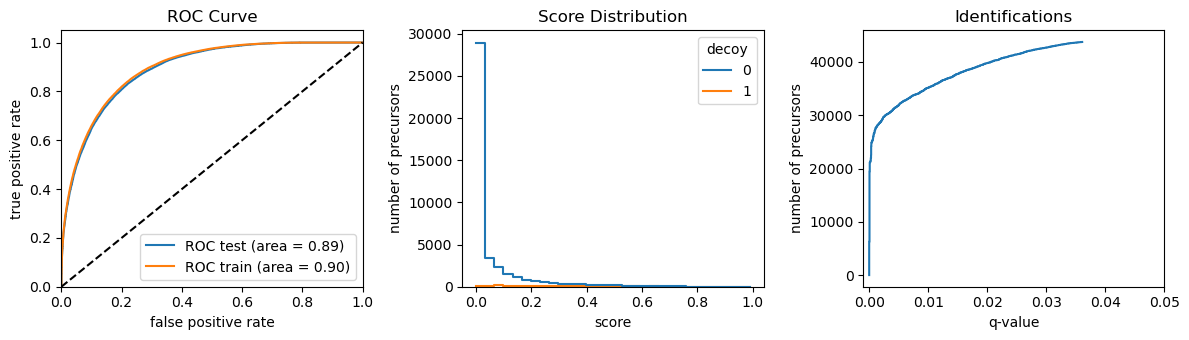

0:34:57.124882  PROGRESS: === extraction finished, 0.05 FDR: 42,234, 0.01 FDR: 34,813, 0.001 FDR: 27,232 ===
0:34:58.289847  INFO: calibration group: precursor, predicting mz
0:34:58.308283  INFO: calibration group: precursor, predicting rt
0:34:58.363941  INFO: calibration group: precursor, predicting mobility
0:34:58.388126  INFO: calibration group: fragment, predicting mz
100%|██████████| 34813/34813 [00:00<00:00, 35423.30it/s]
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:107: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features_df = df[set(df.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])].copy()
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

(67324, 60)
(67324,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


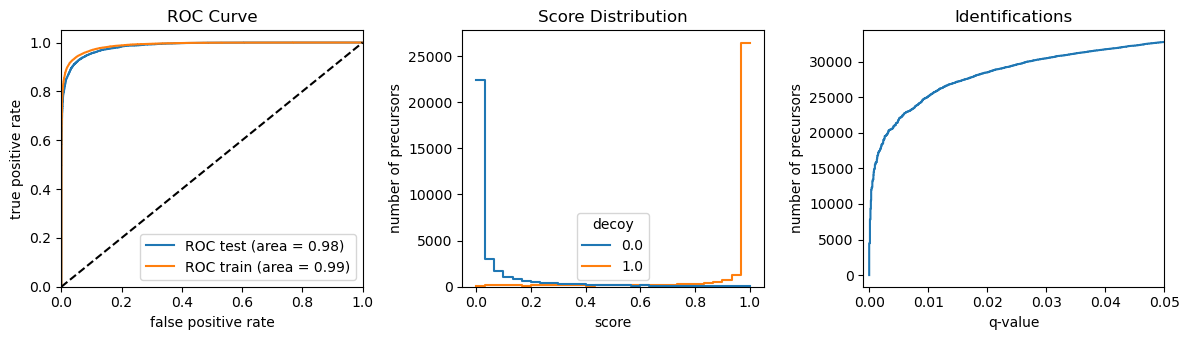

25116
4186
(67306, 60)
(67306,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['decoy'] = np.zeros(len(channel_df))
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


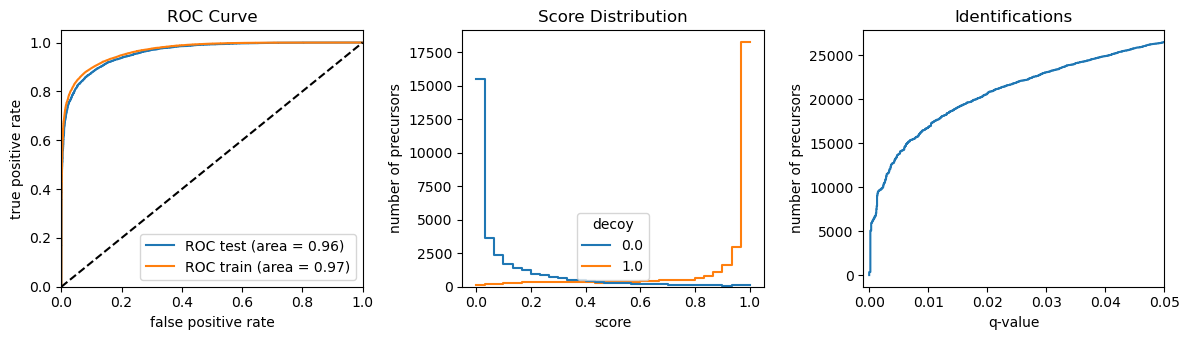

16803
3556


0:36:11.023927  INFO: Importing data from /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-C1_1_1805.d
0:36:11.025097  INFO: Using .d import for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-C1_1_1805.d
0:36:11.025396  INFO: Reading frame metadata for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-C1_1_1805.d
0:36:11.614076  INFO: Reading 16,189 frames with 2,588,634,740 detector events for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_4dig_scans_S2-C1_1_1805.d
100%|██████████| 16189/16189 [00:07<00:00, 2063.49it/s]
0:36:19.547346  INFO: Indexing /Users/georgwallmann/Documents/data/alpha

7838


100%|██████████| 13936/13936 [00:01<00:00, 9932.41it/s] 
0:40:32.510947  INFO: Scored 13936 candidates
0:40:32.516025  INFO: 0.21% of targets failed, 0.48% of decoys failed
0:40:32.632694  INFO: number of dfs in features: 1, total number of features: 13888


(13888, 25)
(13888,)


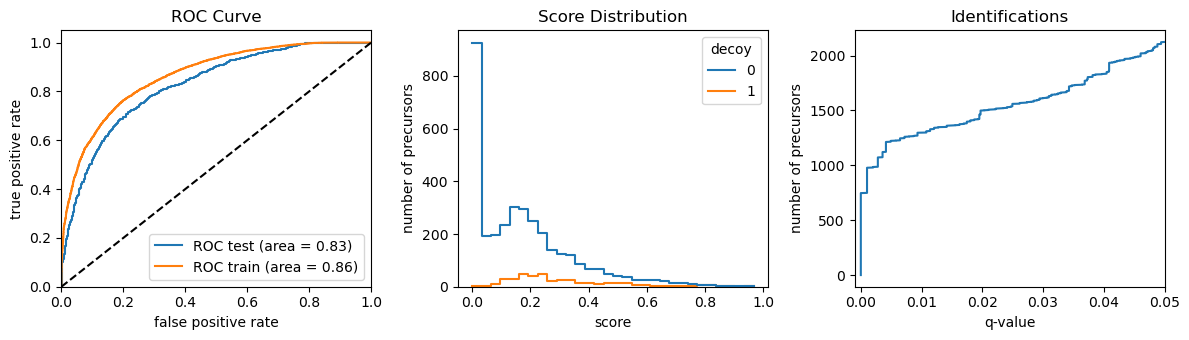

0:40:33.741781  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:40:33.742138  PROGRESS: Accumulated precursors: 3,910, 0.01 FDR: 1,298, 0.001 FDR: 748
0:40:33.743126  INFO: calibration group: precursor, fitting mz estimator 


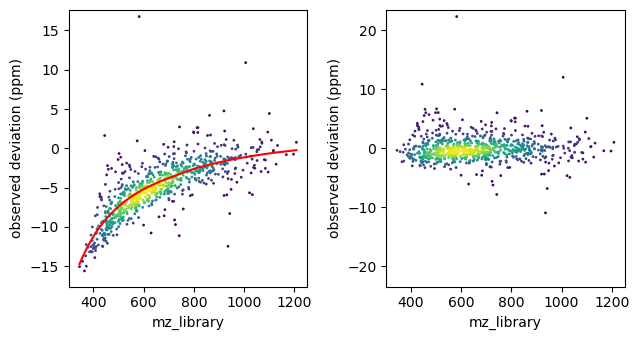

0:40:33.839076  INFO: calibration group: precursor, fitting rt estimator 


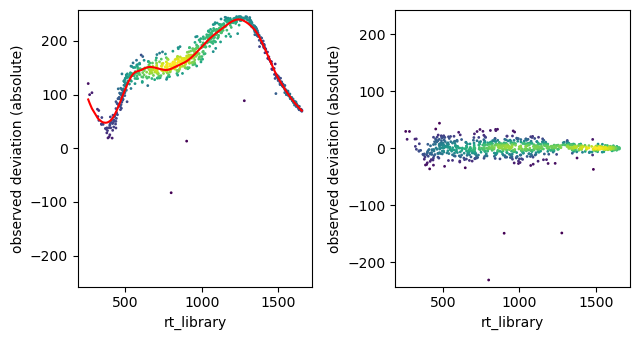

0:40:33.962546  INFO: calibration group: precursor, fitting mobility estimator 


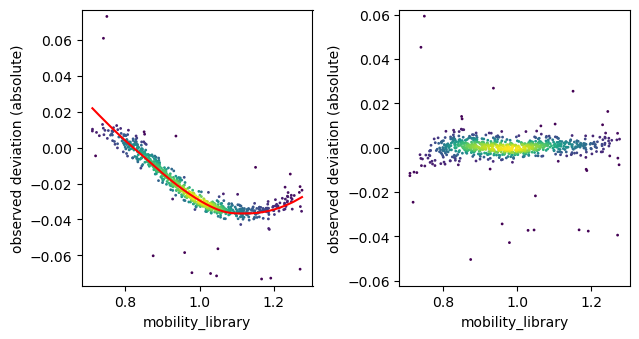

0:40:34.063849  INFO: calibration group: fragment, fitting mz estimator 


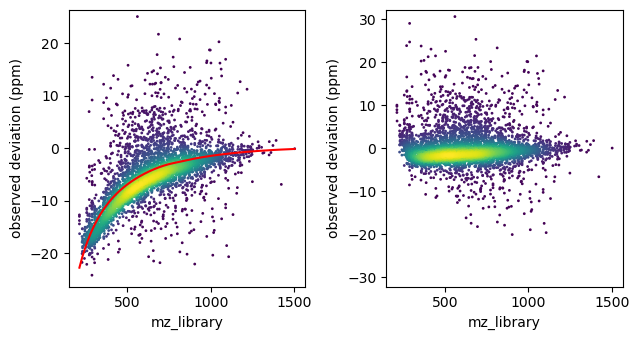

0:40:34.352481  INFO: calibration group: precursor, predicting mz
0:40:34.360499  INFO: calibration group: precursor, predicting rt
0:40:34.383931  INFO: calibration group: precursor, predicting mobility
0:40:34.393341  INFO: calibration group: fragment, predicting mz
0:40:34.703750  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:40:34.708035  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.02
0:40:34.709784  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:40:34.710052  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:40:34.710256  INFO: FWHM in RT is 4.23 seconds, sigma is 1.57
0:40:34.710466  INFO: FWHM in mobility is 0.009 1/K_0, sigma is 5.94


7831


100%|██████████| 13086/13086 [00:01<00:00, 10242.38it/s]
0:40:50.380334  INFO: Scored 13086 candidates
0:40:50.384709  INFO: 0.42% of targets failed, 1.34% of decoys failed
0:40:50.487119  INFO: number of dfs in features: 1, total number of features: 12971


(12971, 25)
(12971,)


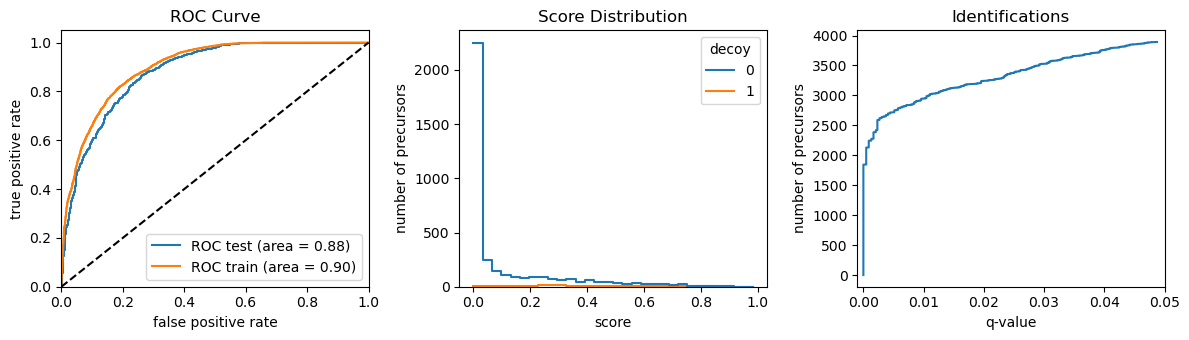

0:40:51.146200  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:40:51.146578  PROGRESS: Accumulated precursors: 3,893, 0.01 FDR: 2,948, 0.001 FDR: 2,244
0:40:51.147843  INFO: calibration group: precursor, fitting mz estimator 


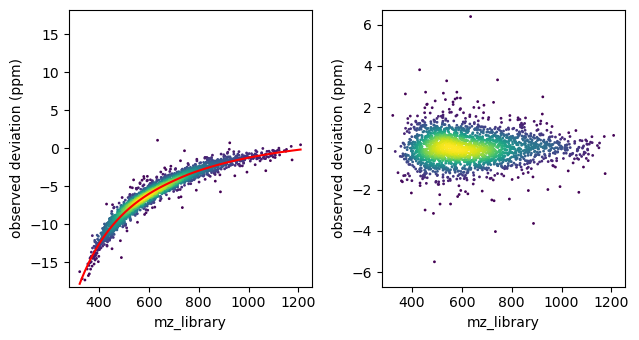

0:40:51.302872  INFO: calibration group: precursor, fitting rt estimator 


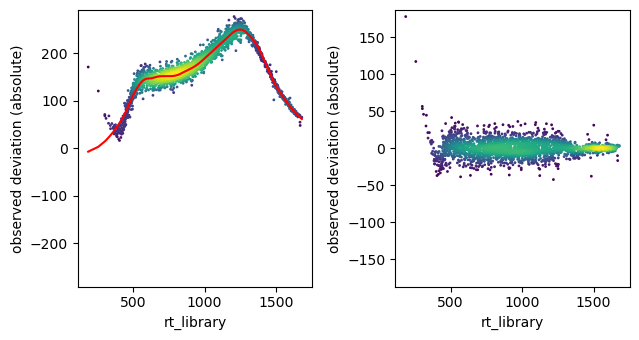

0:40:51.458359  INFO: calibration group: precursor, fitting mobility estimator 


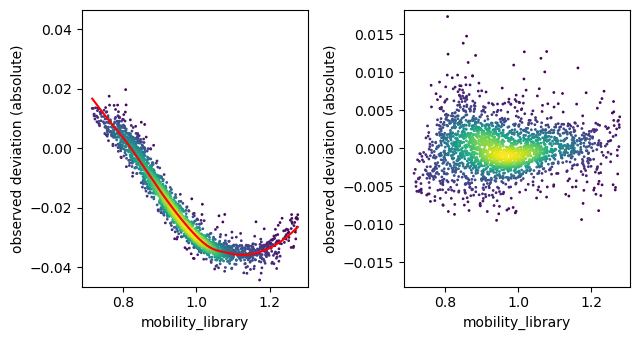

0:40:51.613073  INFO: calibration group: fragment, fitting mz estimator 


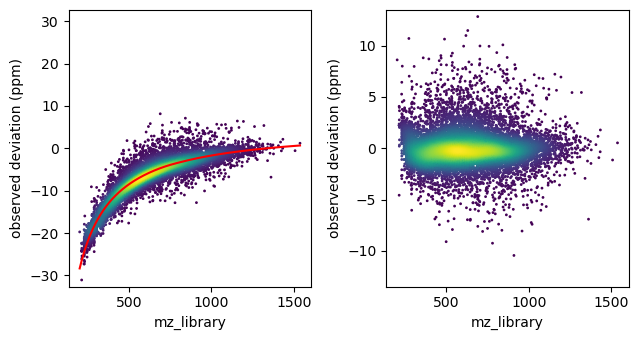

0:40:53.037257  INFO: calibration group: precursor, predicting mz
0:40:53.046653  INFO: calibration group: precursor, predicting rt
0:40:53.069218  INFO: calibration group: precursor, predicting mobility
0:40:53.080081  INFO: calibration group: fragment, predicting mz
0:40:53.402954  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:40:53.407467  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.02
0:40:53.409471  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:40:53.409786  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:40:53.410056  INFO: FWHM in RT is 3.72 seconds, sigma is 1.37
0:40:53.410289  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.28


7840


100%|██████████| 12662/12662 [00:01<00:00, 10312.90it/s]
0:41:09.359444  INFO: Scored 12662 candidates
0:41:09.363678  INFO: 0.63% of targets failed, 1.84% of decoys failed
0:41:09.471750  INFO: number of dfs in features: 1, total number of features: 12506


(12506, 25)
(12506,)


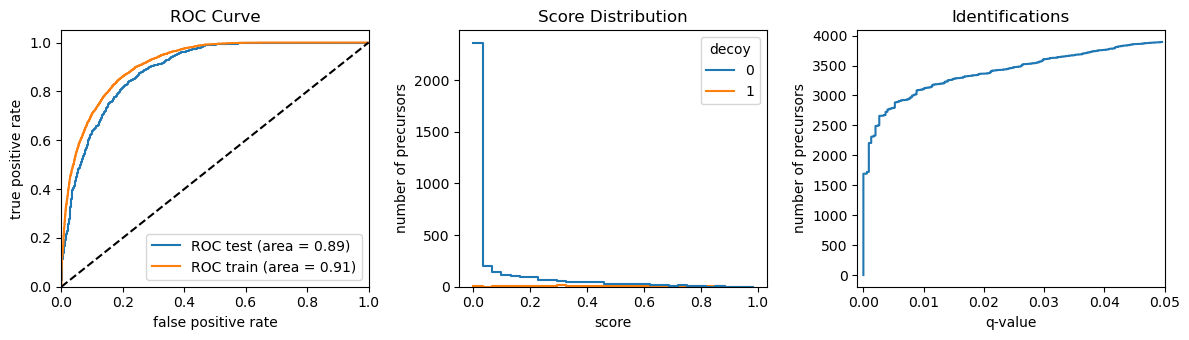

0:41:10.620265  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:41:10.620608  PROGRESS: Accumulated precursors: 3,894, 0.01 FDR: 3,103, 0.001 FDR: 2,206
0:41:10.621996  INFO: calibration group: precursor, fitting mz estimator 


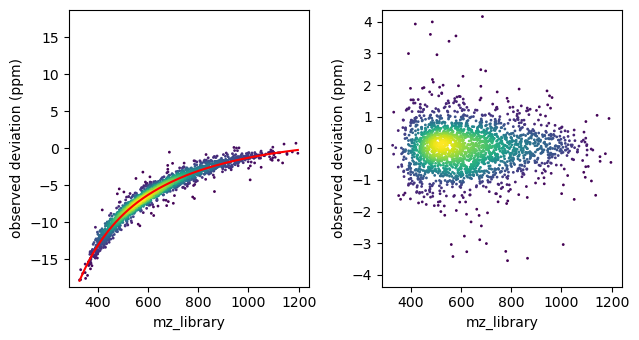

0:41:10.784294  INFO: calibration group: precursor, fitting rt estimator 


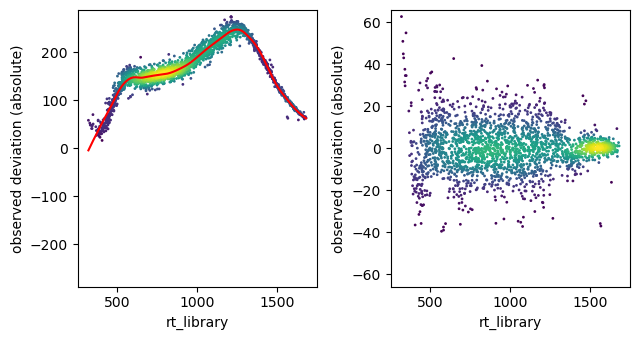

0:41:10.954248  INFO: calibration group: precursor, fitting mobility estimator 


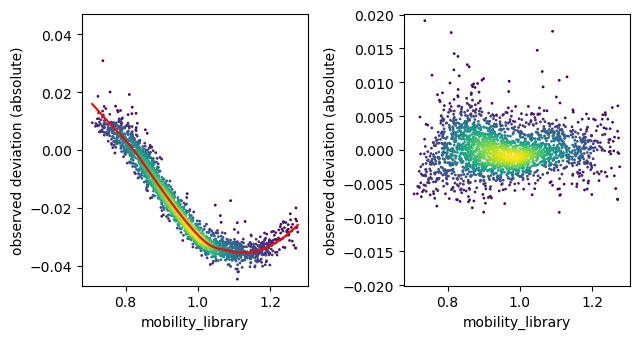

0:41:11.121587  INFO: calibration group: fragment, fitting mz estimator 


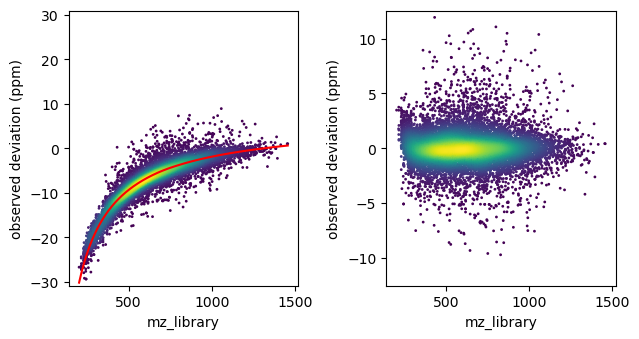

0:41:12.475664  INFO: calibration group: precursor, predicting mz
0:41:12.485023  INFO: calibration group: precursor, predicting rt
0:41:12.506986  INFO: calibration group: precursor, predicting mobility
0:41:12.518130  INFO: calibration group: fragment, predicting mz
0:41:12.818321  INFO: calibration group: precursor, predicting mz
0:41:12.830408  INFO: calibration group: precursor, predicting rt
0:41:12.853887  INFO: calibration group: precursor, predicting mobility
0:41:12.866803  INFO: calibration group: fragment, predicting mz
0:41:13.170182  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.02
0:41:13.183326  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:41:13.183864  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:41:13.184244  INFO: FWHM in RT is 3.67 seconds, sigma is 1.36
0:41:13.184559  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.38


88132


100%|██████████| 307366/307366 [00:30<00:00, 10092.50it/s]
0:46:09.994090  INFO: Scored 307366 candidates
0:46:10.078698  INFO: 0.97% of targets failed, 2.38% of decoys failed


(302213, 25)
(302213,)


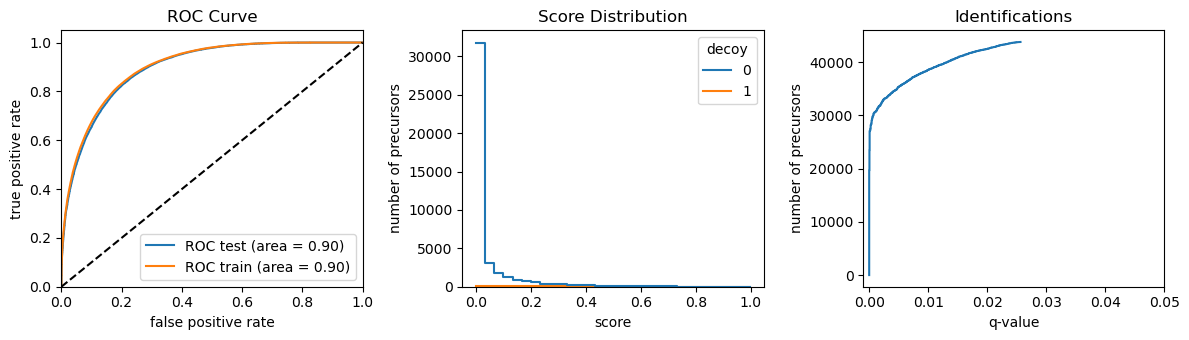

0:46:40.036173  PROGRESS: === extraction finished, 0.05 FDR: 42,670, 0.01 FDR: 38,156, 0.001 FDR: 30,541 ===
0:46:41.211011  INFO: calibration group: precursor, predicting mz
0:46:41.239183  INFO: calibration group: precursor, predicting rt
0:46:41.304354  INFO: calibration group: precursor, predicting mobility
0:46:41.328355  INFO: calibration group: fragment, predicting mz
100%|██████████| 38156/38156 [00:01<00:00, 24378.85it/s]
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:107: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features_df = df[set(df.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])].copy()
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

(73815, 60)
(73815,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


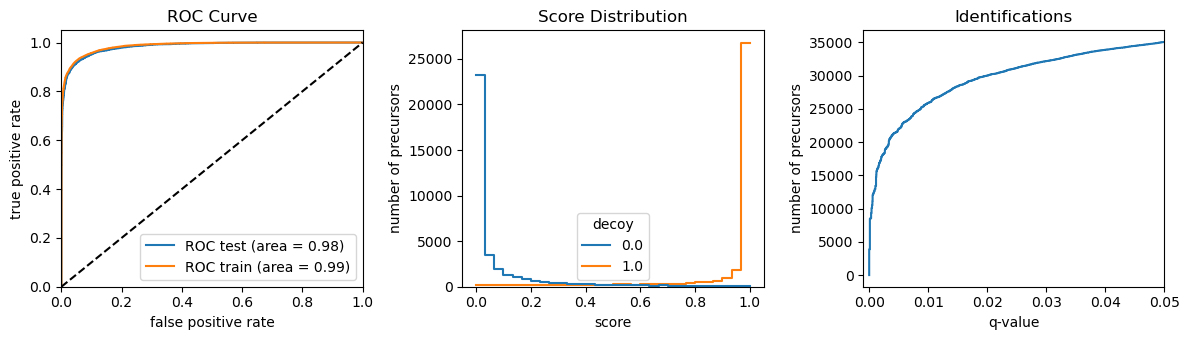

25893
4221
(73793, 60)
(73793,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['decoy'] = np.zeros(len(channel_df))
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_95646/3297341033.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


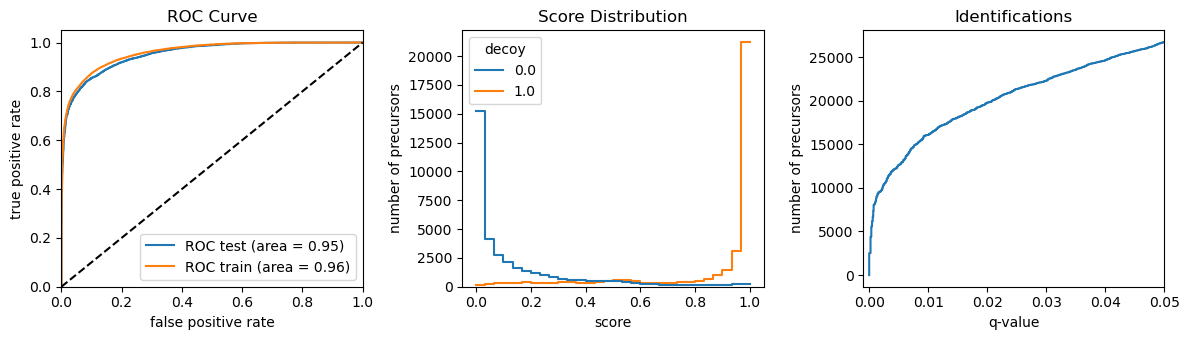

16085
3480


In [3]:
plan = Plan(raw_files, config_update = 
            {'extraction':
                {
                    'target_mobility_tolerance': 0.02,
                    'target_rt_tolerance': 40,
                    'target_ms1_tolerance': 10,
                    'min_epochs': 3,
                }
            }
        )
plan.from_spec_lib_base(test_lib)
for dia_data, precursors_flat, fragments_flat in plan.get_run_data():
    
    reference_flat = precursors_flat[precursors_flat['channel'] == 0].copy()

    workflow = Workflow(
        plan.config, 
        dia_data, 
        reference_flat, 
        fragments_flat
    )

    workflow.calibration()
    d0_df = workflow.extraction()

    raw_name = precursors_flat['raw_name'].iloc[0]
    d0_df.to_csv(os.path.join(output_location, f'{raw_name}_d0.tsv'), sep = '\t', index = False)

    d0_df = d0_df[d0_df['qval'] < 0.01]
    d0_df = d0_df[d0_df['decoy'] == 0]
    workflow.calibration_manager.predict(precursors_flat, 'precursor')
    workflow.calibration_manager.predict(fragments_flat, 'fragment')

    from alphadia.extraction import utils, plexscoring, quadrupole
    import alphatims.utils
    from tqdm import tqdm
    import numba as nb

    multiplex = plexscoring.Multiplexer(precursors_flat, fragments_flat, d0_df.copy())
    candidates_df = multiplex()
    candidates_df['rank'] = np.zeros(len(candidates_df), dtype = np.int64)
    candidates_df = utils.calculate_score_groups(candidates_df, group_channels=True)

    score_group_container = plexscoring.ScoreGroupContainer()
    score_group_container.build_from_df(
        candidates_df['elution_group_idx'].values.astype(np.uint32),
        candidates_df['score_group_idx'].values.astype(np.uint32),
        candidates_df['precursor_idx'].values.astype(np.uint32),
        candidates_df['channel'].values.astype(np.uint8),
        candidates_df['flat_frag_start_idx'].values.astype(np.uint32),
        candidates_df['flat_frag_stop_idx'].values.astype(np.uint32),

        candidates_df['scan_start'].values,
        candidates_df['scan_stop'].values,
        candidates_df['scan_center'].values,
        candidates_df['frame_start'].values,
        candidates_df['frame_stop'].values,
        candidates_df['frame_center'].values,

        candidates_df['charge'].values,
        candidates_df['mz_calibrated'].values.astype(np.float32),
        candidates_df[utils.get_isotope_column_names(candidates_df.columns)].values.astype(np.float32),
    )

    q = quadrupole.SimpleQuadrupole(dia_data.cycle)
    fragment_container = plexscoring.assemble_fragments(fragments_flat)

    config = plexscoring.CandidateConfig()
    config.max_cardinality = 1
    config.score_grouped = True

    alphatims.utils.set_threads(10)

    plexscoring._executor(
        range(len(score_group_container)), 
        score_group_container,
        fragment_container,
        dia_data,
        config.jitclass(),
        q.jit,
        False
    )

    dict_list = []
    precursor_idx_list = []
    channel_list = []


    for elem in tqdm(score_group_container):
        for i, candidate in enumerate(elem.candidates):
            if (len(candidate.features) > 0) and (candidate.channel != 0):
                
                precursor_idx_list.append(candidate.precursor_idx)
                dict_list.append(candidate.features)
                channel_list.append(candidate.channel)

    df = pd.DataFrame(dict_list)
    df['precursor_idx'] = precursor_idx_list
    df['channel'] = channel_list

    df = df.merge(
        precursors_flat[['precursor_idx', 'decoy', 'proteins',]],
        on='precursor_idx',
        how='left'
    )

    features_df = df[set(df.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])].copy()
    all_feature_columns = list(set(features_df.columns) - set(['channel', 'precursor_idx','decoy','proteins']))

    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    from sklearn.neural_network import MLPClassifier

    from alphadia.library import fdr_to_q_values

    output_dfs = []

    for channel in [4,8]:
        channel_df = features_df[features_df['channel'].isin([channel, 12])]
        channel_df['decoy'] = np.zeros(len(channel_df))
        channel_df.loc[channel_df['channel'] == 12, 'decoy'] = 1

        channel_df = channel_df.dropna()

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('GBC',MLPClassifier(hidden_layer_sizes=(50, 25, 5), max_iter=1000, alpha=0.1, learning_rate='adaptive', learning_rate_init=0.001, early_stopping=True, tol=1e-6))
        ])

        X = channel_df[all_feature_columns].values
        y = channel_df['decoy'].values

        
        

        print(X.shape)
        print(y.shape)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        pipeline.fit(X_train, y_train)
        

        y_test_proba = pipeline.predict_proba(X_test)[:,1]
        y_test_pred = np.round(y_test_proba)

        y_train_proba = pipeline.predict_proba(X_train)[:,1]
        y_train_pred = np.round(y_train_proba)

        channel_df['proba'] = pipeline.predict_proba(X)[:,1]
        # subset to the best candidate for every precursor
        channel_df = channel_df.sort_values(by=['proba'], ascending=True)
        features_best_df = channel_df


        # ROC curve
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
        roc_auc_test = auc(fpr_test, tpr_test)

        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
        roc_auc_train = auc(fpr_train, tpr_train)

        
        
        # plotting

        fig, axs = plt.subplots(ncols=3, figsize=(12,3.5))

        axs[0].plot(fpr_test, tpr_test,label="ROC test (area = %0.2f)" % roc_auc_test)
        axs[0].plot(fpr_train, tpr_train,label="ROC train (area = %0.2f)" % roc_auc_train)

        axs[0].plot([0, 1], [0, 1], color="k", linestyle="--")
        axs[0].set_xlim([0.0, 1.0])
        axs[0].set_ylim([0.0, 1.05])
        axs[0].set_xlabel("false positive rate")
        axs[0].set_ylabel("true positive rate")
        axs[0].set_title("ROC Curve")
        axs[0].legend(loc="lower right")
        
        sns.histplot(data=features_best_df, x='proba', hue='decoy', bins=30, element="step", fill=False, ax=axs[1])
        axs[1].set_xlabel('score')
        axs[1].set_ylabel('number of precursors')
        axs[1].set_title("Score Distribution")

        features_best_df = features_best_df.sort_values(['proba'], ascending=True)
        target_values = 1-features_best_df['decoy'].values
        decoy_cumsum = np.cumsum(features_best_df['decoy'].values)
        target_cumsum = np.cumsum(target_values)
        fdr_values = decoy_cumsum/target_cumsum
        features_best_df['qval'] = fdr_to_q_values(fdr_values)
        q_val = features_best_df[features_best_df['qval'] <0.05 ]['qval'].values

        ids = np.arange(0, len(q_val), 1)
        axs[2].plot(q_val, ids)
        axs[2].set_xlim(-0.001, 0.05)
        axs[2].set_xlabel('q-value')
        axs[2].set_ylabel('number of precursors')
        axs[2].set_title("Identifications")
        
        fig.tight_layout()
        plt.show()

        print(len(features_best_df[features_best_df['qval'] <=0.01 ]['qval']))
        print(features_best_df[features_best_df['qval'] <=0.01 ]['proteins'].nunique())


        output_dfs.append(features_best_df[features_best_df['qval'] <=0.01])

    output_dfs = pd.concat(output_dfs)
    output_dfs.to_csv(os.path.join(output_location, f'{raw_name}_d4_d8.tsv'), sep = '\t', index = False)
    